In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-54.3892281488645 151.65244588026945
65.95402239269009 -172.9917274603376
-17.64680819101693 124.31024503755981
79.95768362209895 -109.63904524844703
62.40457704363044 -77.01914673603578
77.54150622088804 109.60554565735538
79.76062963954925 5.329301658703827
-38.95093661601558 -77.93724378115701
61.763669456751785 -53.52088537112212
60.89106902398365 -75.89861680682264
-7.289821606466774 -29.636179938237376
-6.960854341179058 136.23721335253344
0.009536999094748921 -18.58809806453712
-9.68690587310148 -33.92390350992906
61.36835679311483 156.5684708810798
8.174605226698205 95.5933592770765
-4.575594665830067 121.40862313637581
-80.00965672916337 46.55987184992509
60.80113832853576 -158.9298564965779
-87.38584424910837 -165.4362137599707
85.106066364448 -118.05403568631263
13.109970870945872 -55.517189618609535
1.7463137616621935 -104.21841558664548
8.718308166464624 149.05189120794074
69.87587233042723 -117.86941579925335
60.128207205302175 -89.878518141778
-68.22069811648996 55.66333

In [5]:
#import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [48]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1e9f1c3e6f306e964a5b85003960e45


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except Exception as e:
    print(e)
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | barentsburg
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | pitimbu
Processing Record 11 of Set 1 | nabire
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | maragogi
Processing Record 14 of Set 1 | omsukchan
Processing Record 15 of Set 1 | sabang
Processing Record 16 of Set 1 | bone
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | lorengau
Processing Record 24 of Set 1 | thompson
Processing Record 25 of S

Processing Record 1 of Set 5 | mys shmidta
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | slave lake
Processing Record 4 of Set 5 | gorontalo
Processing Record 5 of Set 5 | claveria
Processing Record 6 of Set 5 | aripuana
Processing Record 7 of Set 5 | orlik
Processing Record 8 of Set 5 | chunskiy
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | vanimo
Processing Record 12 of Set 5 | port hardy
Processing Record 13 of Set 5 | tambilil
Processing Record 14 of Set 5 | amderma
Processing Record 15 of Set 5 | awjilah
Processing Record 16 of Set 5 | creel
Processing Record 17 of Set 5 | zhanaozen
Processing Record 18 of Set 5 | airai
Processing Record 19 of Set 5 | zeya
Processing Record 20 of Set 5 | rivadavia
Processing Record 21 of Set 5 | avera
Processing Record 22 of Set 5 | sur
Processing Record 23 of Set 5 | port hedland
Processing Record 24 of Set 5 | namibe
Processing Record 25 of

Processing Record 1 of Set 9 | benxi
Processing Record 2 of Set 9 | fiche
Processing Record 3 of Set 9 | saravan
Processing Record 4 of Set 9 | north bend
Processing Record 5 of Set 9 | chelno-vershiny
Processing Record 6 of Set 9 | picton
Processing Record 7 of Set 9 | beroroha
Processing Record 8 of Set 9 | cairns
Processing Record 9 of Set 9 | pechora
Processing Record 10 of Set 9 | mahibadhoo
Processing Record 11 of Set 9 | kloulklubed
Processing Record 12 of Set 9 | mitsamiouli
Processing Record 13 of Set 9 | derzhavinsk
Processing Record 14 of Set 9 | hamilton
Processing Record 15 of Set 9 | porteirinha
Processing Record 16 of Set 9 | mountain home
Processing Record 17 of Set 9 | hofn
Processing Record 18 of Set 9 | abalak
Processing Record 19 of Set 9 | egvekinot
Processing Record 20 of Set 9 | san juan de los lagos
Processing Record 21 of Set 9 | grand centre
Processing Record 22 of Set 9 | arlit
Processing Record 23 of Set 9 | trairi
Processing Record 24 of Set 9 | eldorado
Pr

Processing Record 1 of Set 13 | kangaba
Processing Record 2 of Set 13 | medicine hat
Processing Record 3 of Set 13 | kanniyakumari
Processing Record 4 of Set 13 | dakoro
Processing Record 5 of Set 13 | mandurah
Processing Record 6 of Set 13 | iracoubo
Processing Record 7 of Set 13 | canico
Processing Record 8 of Set 13 | spring
Processing Record 9 of Set 13 | kenai
Processing Record 10 of Set 13 | novo oriente
Processing Record 11 of Set 13 | koumac
Processing Record 12 of Set 13 | kazalinsk
Processing Record 13 of Set 13 | kilindoni
Processing Record 14 of Set 13 | los algarrobos
Processing Record 15 of Set 13 | beian
Processing Record 16 of Set 13 | birin
Processing Record 17 of Set 13 | yumen
Processing Record 18 of Set 13 | odweyne
Processing Record 19 of Set 13 | chopda
Processing Record 20 of Set 13 | hervey bay
Processing Record 21 of Set 13 | cheuskiny
Processing Record 22 of Set 13 | lyuban
Processing Record 23 of Set 13 | lolua
Processing Record 24 of Set 13 | vicovu de jos
P

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kidal,-21.2078,-159.7750,77.05,83,75,13.80,CK,2022-09-26 21:37:25
1,Kidal,-21.2078,-159.7750,77.05,83,75,13.80,CK,2022-09-26 21:37:25
2,Kidal,-21.2078,-159.7750,77.05,88,100,13.80,CK,2022-09-26 21:57:12
3,Kidal,18.4411,1.4078,93.81,12,36,7.63,ML,2022-09-26 22:27:47


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664403753.3217583

In [30]:
today = time.strftime("%x")
today 

'09/29/22'

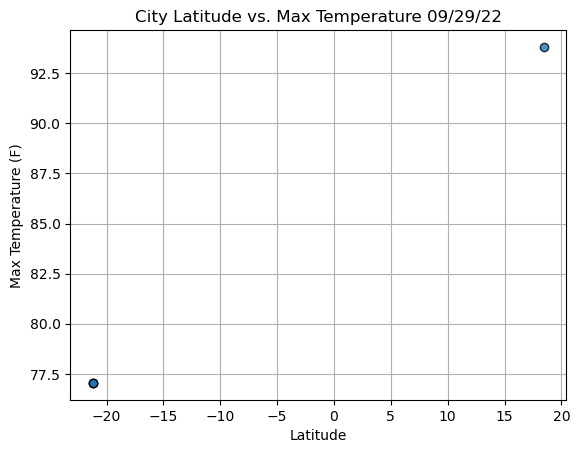

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

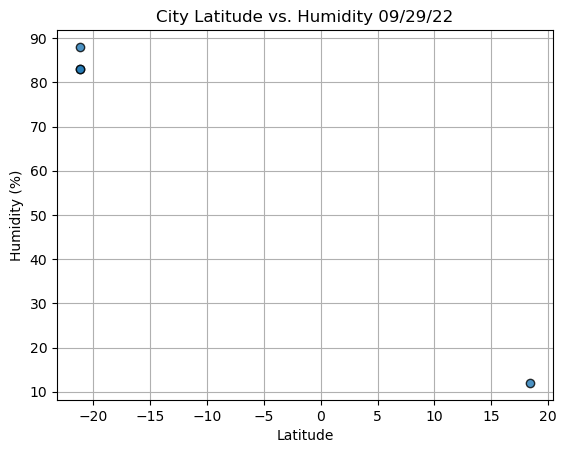

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

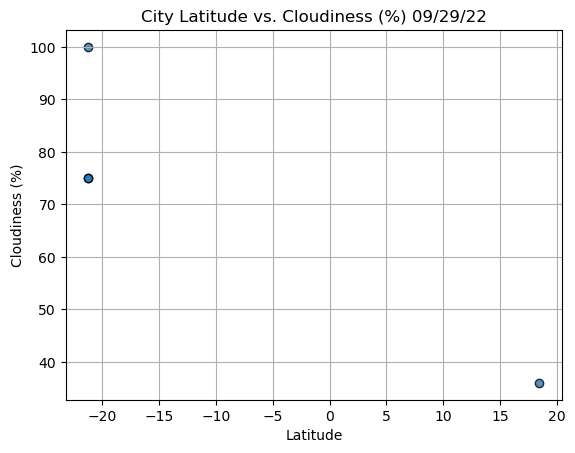

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

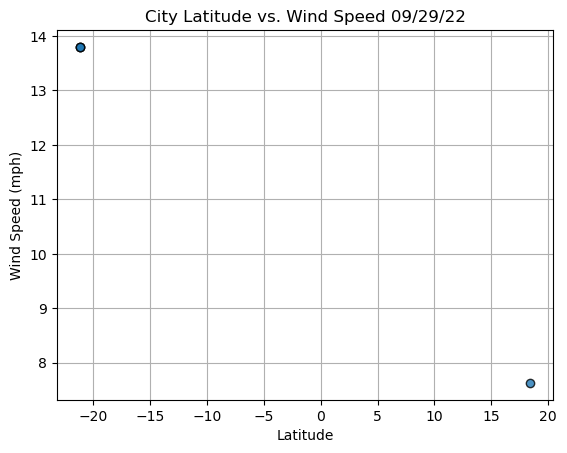

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df["Lat"] >= 0

0    False
1    False
2    False
3     True
Name: Lat, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kidal,18.4411,1.4078,93.81,12,36,7.63,ML,2022-09-26 22:27:47


In [40]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kidal,18.4411,1.4078,93.81,12,36,7.63,ML,2022-09-26 22:27:47


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


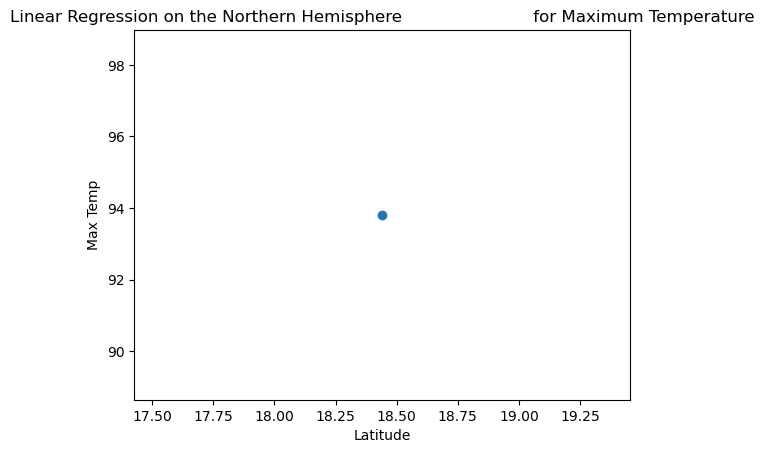

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

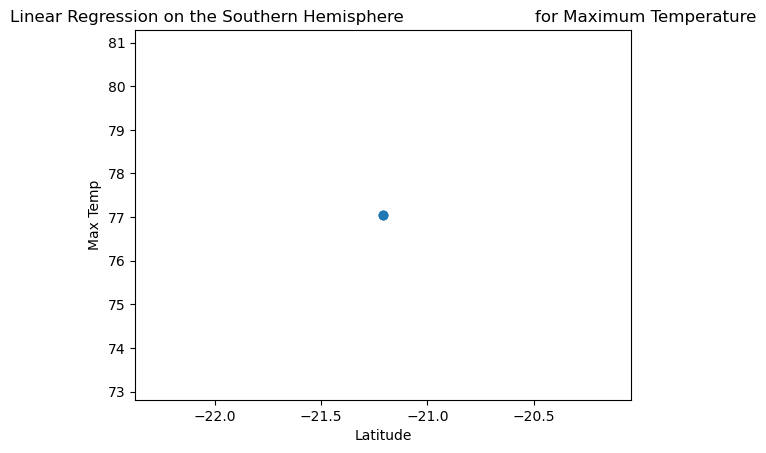

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

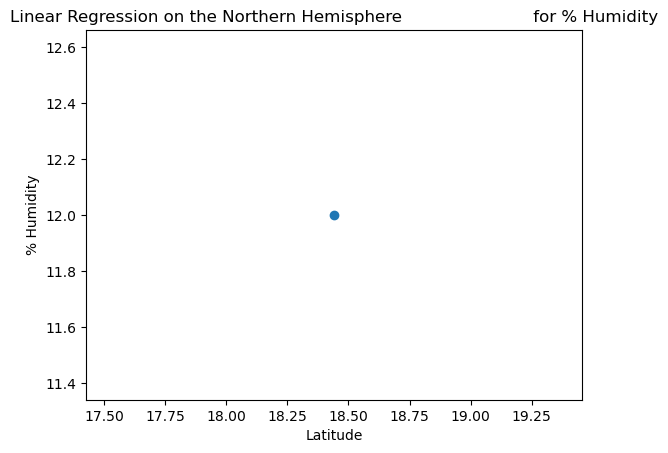

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


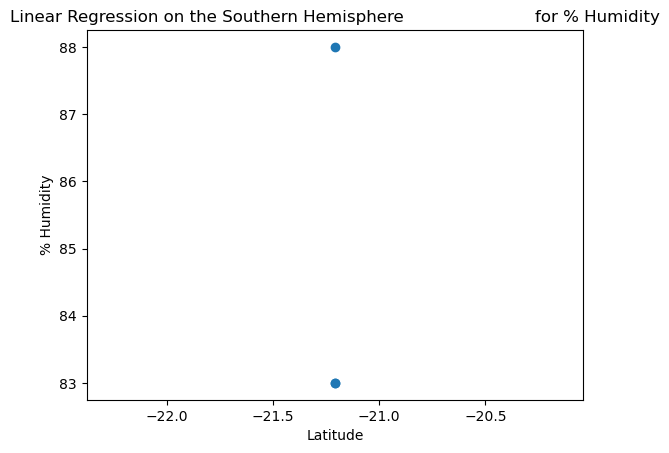

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


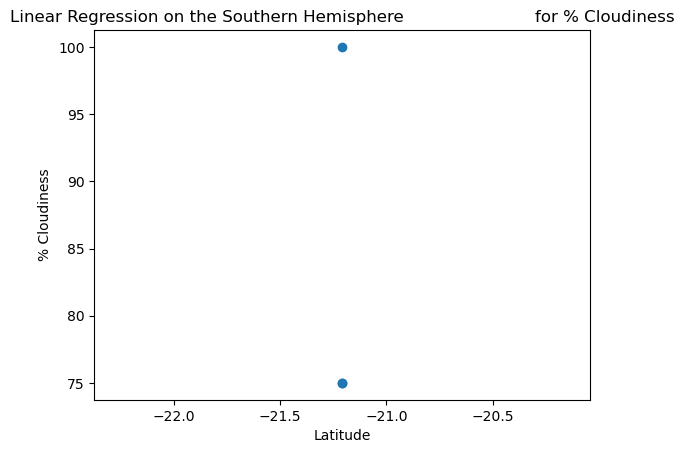

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Admin\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


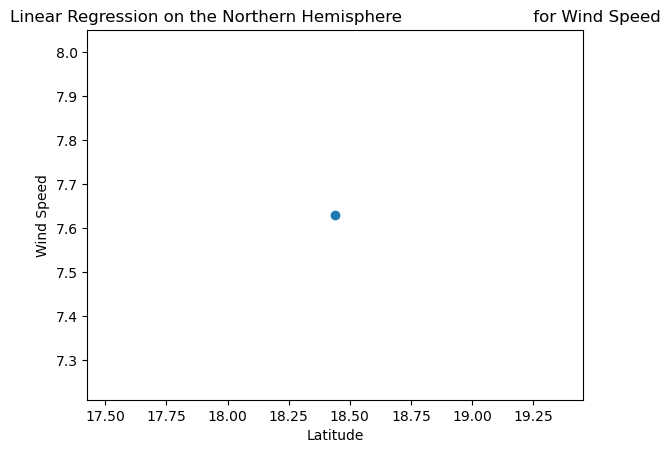

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

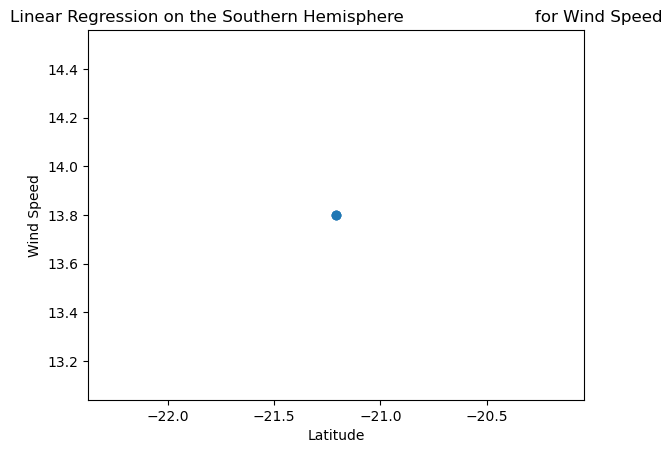

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))